# 1.Scaling

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")
df.to_csv("social_ntw.csv",index=False)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [7]:
data = df.iloc[: , 2:]
data

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


Data Leakage 
------------

-Data leakage is a mistake that occurs when information about the target variable leaks into the input of a machine learning model during training. This information will not be available in the ongoing data that the model will be used to predict on. 

-Data leakage can cause high performance on the training set, but poor performance in production. For example, including a "MonthlySalary" column when predicting "YearlySalary". 

-To prevent data leakage, you can: 
* Split your data into training and validation sets before performing any preprocessing steps.
* Use only features about the current session.
* Data leakage can also refer to the unauthorized transmission of data from an organization to any external source. This data can be leaked physically or electronically.




### StandardScaler

In [8]:
data

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
data.drop('Purchased',axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [11]:
data.shape

(400, 3)

In [12]:

X_Train,X_Test, y_Train,y_Test= train_test_split(data.drop('Purchased',axis=1),data['Purchased'],test_size=0.25)


In [13]:
X_Train

,Age,EstimatedSalary
227,56.0,133000.0
146,27.0,96000.0
2,26.0,43000.0
90,22.0,81000.0
392,45.0,45000.0
...,...,...
168,29.0,148000.0
206,55.0,130000.0
103,33.0,149000.0
6,27.0,84000.0


In [14]:
X_Test

,Age,EstimatedSalary
113,37.0,55000.0
333,40.0,65000.0
293,37.0,77000.0
117,36.0,52000.0
243,56.0,104000.0
...,...,...
44,28.0,84000.0
51,18.0,44000.0
69,31.0,68000.0
158,26.0,30000.0


In [15]:
y_Train

227    1
146    1
2      0
90     0
392    1
      ..
168    1
206    1
103    1
6      0
140    0
Name: Purchased, Length: 300, dtype: int64

In [16]:
y_Test

113    0
333    0
293    0
117    0
243    1
      ..
44     0
51     0
69     0
158    0
248    0
Name: Purchased, Length: 100, dtype: int64

### StandardScaler 

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_Train)

StandardScaler()

fit() method: In the context of a scaler, the fit() method computes the necessary parameters needed to scale or standardize the data. These parameters include the mean and standard deviation for standardization or the minimum and maximum values for Min-Max scaling. The fit() method analyzes the training data to determine these parameters.

In [20]:
scaler.transform(X_Train)

array([[ 1.72238953e+00,  1.83081865e+00],
       [-1.02107237e+00,  7.56769338e-01],
       [-1.11567451e+00, -7.81733727e-01],
       [-1.49408304e+00,  3.21343942e-01],
       [ 6.81766049e-01, -7.23677008e-01],
       [-1.68328731e+00, -1.36230092e+00],
       [ 1.14153242e-01,  1.85984701e+00],
       [ 1.43858312e+00,  3.50372302e-01],
       [ 2.00619593e+00, -1.18813076e+00],
       [ 1.15477672e+00, -7.52705368e-01],
       [ 2.00619593e+00, -8.10762087e-01],
       [-6.42663833e-01, -1.50744272e+00],
       [ 2.10079807e+00, -6.94648648e-01],
       [ 3.97959645e-01,  1.10510965e+00],
       [-7.50510266e-02, -5.20478490e-01],
       [-1.02107237e+00, -3.46308331e-01],
       [-2.64255295e-01,  3.10603449e-02],
       [ 3.03357511e-01,  2.92315582e-01],
       [-7.37265968e-01, -1.53647108e+00],
       [-1.77788945e+00, -1.47841436e+00],
       [-2.64255295e-01, -3.17279972e-01],
       [-7.50510266e-02, -3.75336691e-01],
       [-1.39948091e+00,  3.50372302e-01],
       [ 2.

 1. X_train: This variable will hold the features (independent variables) of your training dataset. It typically contains the data you will use to train your machine learning model. These features are derived from the DataFrame data after dropping the 'Purchased' column using data.drop('Purchased', axis=1).

2. X_test: This variable will hold the features (independent variables) of your testing dataset. It contains the data that you will use to evaluate your machine learning model's performance. Like X_train, these features are derived from the DataFrame data after dropping the 'Purchased' column.

3. y_train: This variable will hold the target variable (dependent variable) for the training dataset. It typically contains the labels or values that you want to predict using your machine learning model. In this case, it's the 'Purchased' column from the DataFrame data.

4. y_test: This variable will hold the target variable (dependent variable) for the testing dataset. It contains the labels for the testing data. You'll use this to compare the model's predictions against the actual values to evaluate its performance.

5. train_test_split(data.drop('Purchased', axis=1), data['Purchased'], test_size=0.25): This is the function call to train_test_split. It takes several arguments:

6. data.drop('Purchased', axis=1): This part extracts the features (X) from the DataFrame data by dropping the 'Purchased' column. The axis=1 argument indicates that you want to drop a column, not a row.
data['Purchased']: This part extracts the target variable (y) from the DataFrame data, specifically the 'Purchased' column.
test_size=0.25: This parameter specifies the proportion of the data to include in the testing dataset. In this case, 25% of the data will be used for testing, and the remaining 75% will be used for training. You can adjust the test_size according to your specific needs.
After executing this code, you will have the data split into training and testing sets, with X_train and y_train containing the training features and labels, and X_test and y_test containing the testing features and labels, respectively. These sets are typically used to train and evaluate machine learning models.







In [21]:
X_train_scaled_std = scaler.transform(X_Train)

In [22]:
X_test_scaled_std = scaler.transform(X_Test)

In [23]:
X_train_Scaled = pd.DataFrame(X_train_scaled_std, columns = X_Train.columns)
X_train_Scaled

,Age,EstimatedSalary
0,1.722390,1.830819
1,-1.021072,0.756769
2,-1.115675,-0.781734
3,-1.494083,0.321344
4,0.681766,-0.723677
...,...,...
295,-0.831868,2.266244
296,1.627787,1.743734
297,-0.453460,2.295272
298,-1.021072,0.408429


In [24]:
X_Train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.793333,69930.000000
std,10.588248,34506.629192
min,18.000000,15000.000000
25%,30.000000,42750.000000
50%,37.000000,71000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [25]:
X_train_Scaled.describe()

,Age,EstimatedSalary
count,3.000000e+02,300.000000
mean,-3.197442e-16,0.000000
std,1.001671e+00,1.001671
min,-1.872492e+00,-1.594528
25%,-7.372660e-01,-0.788991
50%,-7.505103e-02,0.031060
75%,7.763682e-01,0.524542
max,2.100798e+00,2.324301


In [26]:
np.round(X_Train.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,37.8,69930.0
std,10.6,34506.6
min,18.0,15000.0
25%,30.0,42750.0
50%,37.0,71000.0
75%,46.0,88000.0
max,60.0,150000.0


In [27]:
np.round(X_train_Scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.3


## Effect of scaling

Text(0.5, 1.0, 'after scaling')

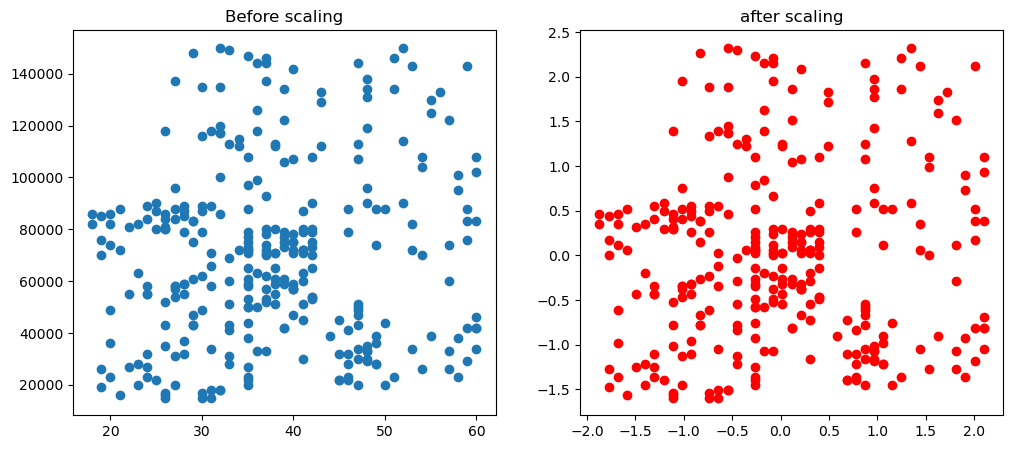

In [28]:
fig , (ax1 ,ax2) = plt.subplots(ncols=2 , figsize=(12,5))


ax1.scatter(X_Train['Age'],X_Train['EstimatedSalary'])
ax1.set_title('Before scaling')

ax2.scatter(X_train_Scaled['Age'],X_train_Scaled['EstimatedSalary'],color='red')
ax2.set_title('after scaling')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

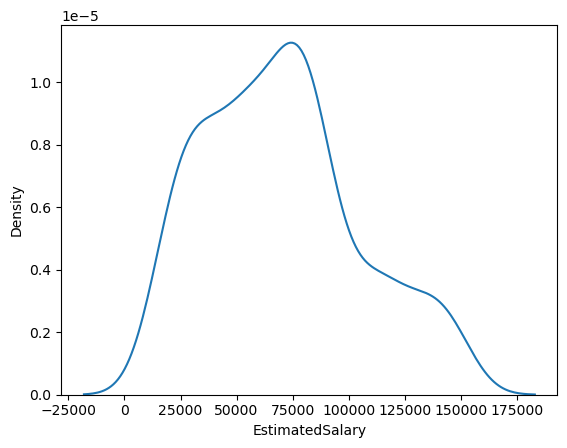

In [29]:
import seaborn as sns
sns.kdeplot (X_Train['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

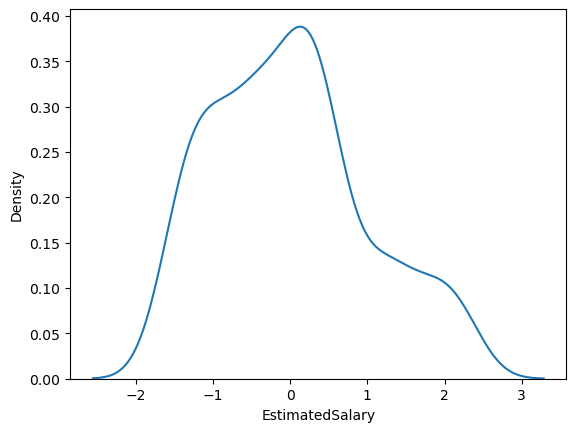

In [30]:
sns.kdeplot (X_train_Scaled['EstimatedSalary'])

# MIN MAX Scaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [32]:
scaler_min_max.fit(X_Train)

MinMaxScaler()

In [33]:
min_max_train = scaler_min_max.transform(X_Train)

In [34]:
min_max_test = scaler_min_max.transform(X_Test)

In [35]:
X_train_s = pd.DataFrame(min_max_train,columns=X_Train.columns)
X_test_s = pd.DataFrame(min_max_test,columns=X_Test.columns)

In [36]:
np.round(X_train_s.describe())

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1.0,1.0
max,1.0,1.0


In [37]:
np.round(X_test_s.describe())

,Age,EstimatedSalary
count,100.0,100.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1.0,0.0
max,1.0,1.0


Text(0.5, 1.0, 'after scaling')

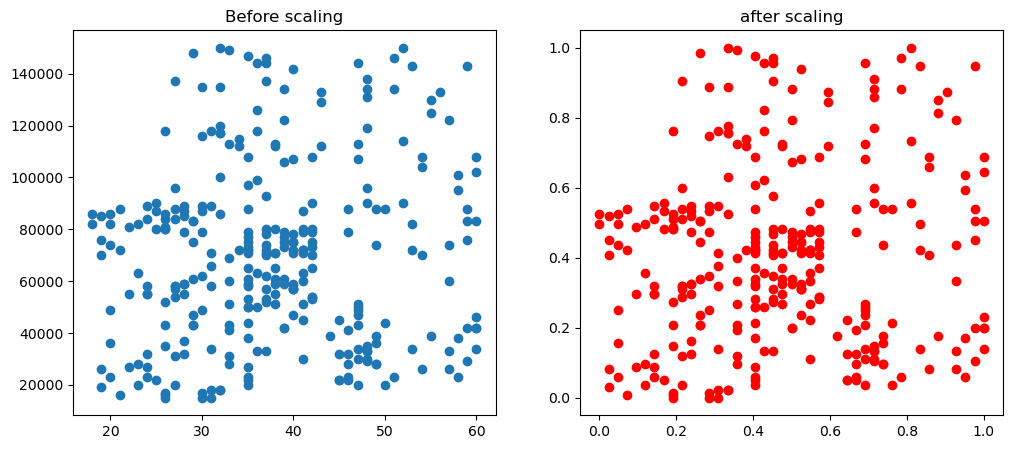

In [38]:
fig , (ax1 ,ax2) = plt.subplots(ncols=2 , figsize=(12,5))


ax1.scatter(X_Train['Age'],X_Train['EstimatedSalary'])
ax1.set_title('Before scaling')

ax2.scatter(X_train_s['Age'], X_train_s['EstimatedSalary'],color='red')
ax2.set_title('after scaling')

## ENCODING

In [39]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")
df2

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No
5,31,Female,Average,School,Yes
6,18,Male,Good,School,No
7,60,Female,Poor,School,Yes
8,65,Female,Average,UG,No
9,74,Male,Good,UG,Yes


In [40]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [41]:
df2.to_csv("customer.csv",index=None)

In [42]:
df2.sample(5)

,age,gender,review,education,purchased
41,23,Male,Good,PG,Yes
48,39,Female,Good,UG,Yes
33,89,Female,Good,PG,Yes
7,60,Female,Poor,School,Yes
4,16,Female,Average,UG,No


### ordinal encoding

In [43]:
df2_ =df2.iloc[: ,2:-1]

In [44]:
df2_.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


Train Test splitting

In [45]:
x_train , x_test = train_test_split(df2_,test_size=0.25)

In [46]:
x_train.shape

(37, 2)

In [47]:
x_test.shape

(13, 2)

In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
encoder=OrdinalEncoder(categories=[['Poor','Average','Good'],["School","UG","PG"]])

In [50]:
encoder.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [51]:
x_train_encoded = encoder.transform(x_train)
x_train_encoded 

array([[2., 1.],
       [2., 2.],
       [2., 2.],
       [2., 0.],
       [2., 1.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [2., 0.],
       [1., 1.],
       [0., 2.],
       [2., 2.],
       [0., 2.],
       [1., 0.],
       [2., 2.],
       [0., 0.],
       [0., 2.],
       [1., 1.],
       [1., 2.],
       [0., 2.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 2.],
       [2., 2.],
       [2., 1.],
       [1., 0.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [0., 1.],
       [1., 2.],
       [0., 1.]])

In [52]:
x_test_encoded = encoder.transform(x_test)
x_test_encoded 

array([[2., 1.],
       [0., 2.],
       [0., 0.],
       [0., 0.],
       [0., 2.],
       [0., 0.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [0., 1.],
       [2., 0.],
       [1., 2.],
       [1., 1.]])

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
df2_p = df2[['gender','age']]
df2_p

,gender,age
0,Female,30
1,Female,68
2,Female,70
3,Female,72
4,Female,16
5,Female,31
6,Male,18
7,Female,60
8,Female,65
9,Male,74


In [55]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)


In [56]:
ohe.fit(df2_p[['gender']])

d:\ANACONDA\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False,
              sparse_output=False)

In [57]:
ohe.transform(df2_p[['gender']])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [58]:
df3 = pd.read_csv('titanic.csv')

In [59]:
df3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df3[['Age','Fare','SibSp','Survived']]

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,1,0
889,26.0,30.0000,0,1


In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df3.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

numeric     -----> mean , median

categorical -----> mode 

In [63]:
X_Train_ ,X_Test_ = train_test_split(df3,test_size=0.25)

In [64]:
X_Train_

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
...,...,...,...,...,...,...,...,...,...,...,...,...
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.2250,NaN,S
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S


In [65]:
X_Test_

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
520,521,1,1,"Perreault, Miss. Anne",female,30.00,0,0,12749,93.5000,B73,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.00,0,2,345773,24.1500,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.00,2,0,315151,8.6625,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.00,0,0,113059,47.1000,NaN,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.00,0,0,113051,27.7500,C111,C


Filling the missing values with mean of age 

In [66]:
mean_age = X_Train_['Age'].mean()
mean_age

30.111425925925925

In [67]:
X_Train_['Age'].fillna(mean_age)

846    30.111426
120    21.000000
624    21.000000
374     3.000000
789    46.000000
         ...    
488    30.000000
828    30.111426
682    20.000000
794    25.000000
484    25.000000
Name: Age, Length: 668, dtype: float64

In [68]:
X_Train_['Age'].fillna(mean_age).isnull().sum()

0

Filling the missing values with median age 

In [69]:
median_age = X_Train_['Age'].median()

In [70]:
X_Train_['Age'].fillna(median_age)

846    29.0
120    21.0
624    21.0
374     3.0
789    46.0
       ... 
488    30.0
828    29.0
682    20.0
794    25.0
484    25.0
Name: Age, Length: 668, dtype: float64

In [71]:
X_Train_['Age'].fillna(median_age).isnull().sum()

0

In [72]:
#You can also use 
#sklearn 

#simple imputer 

In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df3['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [75]:
df3['Cabin'].fillna(df3['Cabin'].mode()[0] )

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

univariate missing values 

* simple imputer

Multivariate missing values 

* knn imputer

# Outlier Detection and handling

- Outliers are observations that are an abnormal distance from other values in a random sample from a population. They can be caused by: Experimental errors, Intentional errors, Data processing.


- Here are some ways to detect outliers:
------------------------------------------
1. Percentile method
2. IQR method
3. Z-score method
4. Mahalanobis Distance
5. DBSCAN
6. Local Outlier Factor (LOF)
7. One-Class SVM (Support Vector Machine)


- Once outliers are detected, they can be handled in several ways, such as:
----------------------------------------------------------------------------- 
1. Removal
2. Transformation
3. Imputation
4. Reducing the weights of outliers (trimming weight)
5. Changing the values of outliers (Winsorisation, trimming, imputation)
6. Using robust estimation techniques (M-estimation)

Analysts can identify outliers through visualization or statistical methods. They can then evaluate their impact on analysis. 


### **When to keep the outlier and when to remove the outlier** 

# Outler handling and Detection

In [76]:
d = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [77]:
d.to_csv('Placement.csv',index=None)

In [78]:
df4 = pd.read_csv('Placement.csv')

In [79]:
df4.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [80]:
df4.sample(5)

,cgpa,placement_exam_marks,placed
744,7.49,58.0,0
158,5.74,50.0,0
516,6.83,28.0,0
182,6.87,76.0,0
647,6.69,4.0,1


In [81]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.96124,0.615898,4.89,6.55,6.96,7.37,9.12
placement_exam_marks,1000.0,32.22500,19.130822,0.00,17.00,28.00,44.00,100.00
placed,1000.0,0.48900,0.500129,0.00,0.00,0.00,1.00,1.00


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_16028\1161735624.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['cgpa'])
C:\Users\hp\AppData\Local\Temp\ipykernel_16028\1161735624.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['placement_exam_marks'])


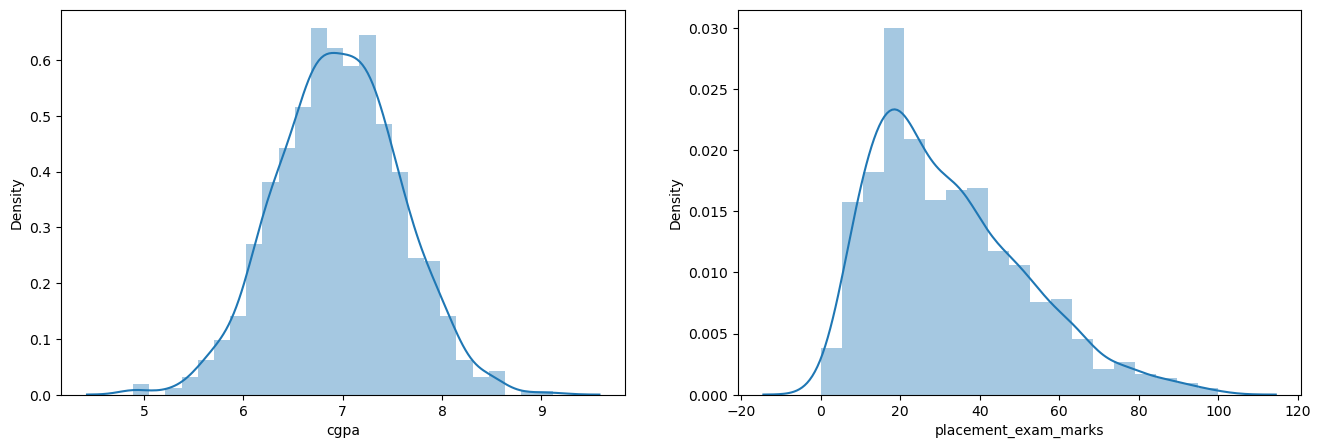

In [83]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df4['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df4['placement_exam_marks'])

plt.show()

In [84]:
df4['placement_exam_marks']

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 1000, dtype: float64

In [85]:
df4['placement_exam_marks'].skew()

0.8356419499466834

In [86]:
df4['placement_exam_marks'].mean()

32.225

In [87]:
df4['cgpa'].mean()

6.96124

In [88]:
df4['cgpa'].std()

0.6158978751323894

In [89]:
df4['cgpa'].min()

4.89

In [90]:
df4['cgpa'].max()

9.12

In [91]:
df4['cgpa'].mean() + 3 * df4['cgpa'].std()

8.808933625397168

In [92]:
df4['cgpa'].mean() - 3 * df4['cgpa'].std()

5.113546374602832

In [93]:
 df4[df4['cgpa']>8.8]


,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [94]:
df4[df4['cgpa']<5.11]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [95]:
 df4[ (df4['cgpa']>8.8) | (df4['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**TRIMMING**

In [96]:
df5 = df4[ (df4['cgpa']<=8.8) & (df4['cgpa']>=5.11)]
df5

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


C:\Users\hp\AppData\Local\Temp\ipykernel_16028\234676183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

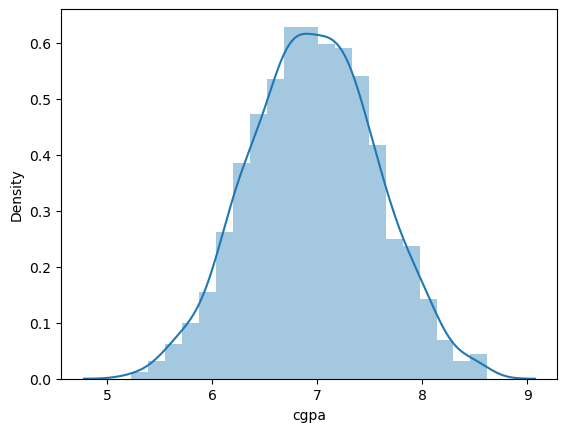

In [97]:

sns.distplot(df5['cgpa'])

**CAPPING**


In [168]:
upper_limit = df4['cgpa'].mean() + 3 * df4['cgpa'].std()
lower_limit = df4['cgpa'].mean() - 3 * df4['cgpa'].std() 

In [169]:
np.where(df4['cgpa']>upper_limit)

(array([  9,  40,  61, 134, 162, 283, 290, 311, 324, 630, 685, 730, 771,
        846, 917], dtype=int64),)

In [166]:
np.where(df4['cgpa']<lower_limit)

(array([], dtype=int64),)

In [167]:
np.where(df4['cgpa']>upper_limit ,upper_limit, np.where(df4['cgpa']<lower_limit,lower_limit,df4['cgpa']))

array([ 5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637, 84.5       ,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
       84.5       ,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11354637,
        5.11354637, 84.5       ,  5.11354637,  5.11354637,  5.11354637,
        5.11354637,  5.11354637,  5.11354637,  5.11354637,  5.11

In [102]:
df4['cgpa'] = np.where(df4['cgpa']>upper_limit,upper_limit,df4['cgpa'])  

In [160]:
df4['cgpa'] = np.where(df4['cgpa']<lower_limit,lower_limit,df4['cgpa']) 

In [161]:
df4['cgpa'].max() 

84.5

In [162]:
df4['cgpa'].min()

4.89

In [163]:
upper_limit

88.73275602410413

In [164]:
lower_limit

-24.459756024104145

In [108]:
df4.shape

(1000, 3)

C:\Users\hp\AppData\Local\Temp\ipykernel_16028\3621475264.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

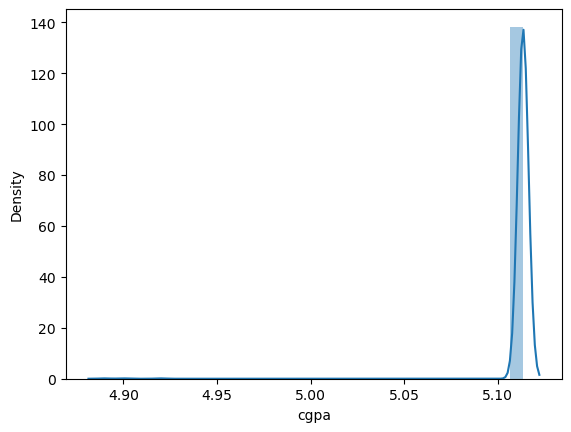

In [109]:
sns.distplot(df4['cgpa'])

<Axes: >

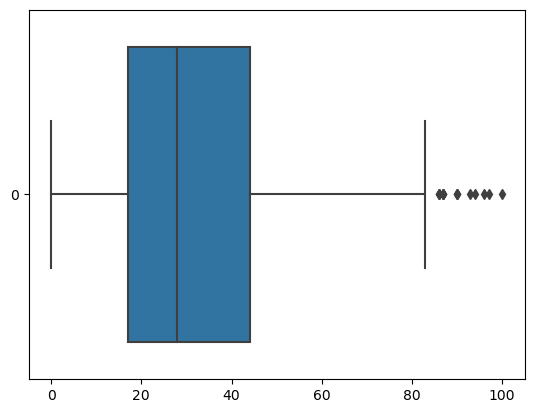

In [166]:
sns.boxplot(df4['placement_exam_marks'],orient='horizontal')

In [110]:
percentile25= df4['placement_exam_marks'].quantile(0.25)
percentile75= df4['placement_exam_marks'].quantile(0.75)

In [111]:
percentile25

17.0

In [112]:
percentile75

44.0

In [116]:
iqr = percentile75 -percentile25
iqr

27.0

In [117]:
lower_fence = percentile25 - 1.5 * iqr
upper_fence = percentile75 + 1.5 * iqr

In [118]:
lower_fence

-23.5

In [119]:
upper_fence

84.5

In [123]:
df4[df4['placement_exam_marks']>upper_fence]

,cgpa,placement_exam_marks,placed
9,5.113546,94.0,1
40,5.113546,86.0,1
61,5.113546,86.0,0
134,5.113546,93.0,0
162,5.113546,90.0,0
283,5.113546,87.0,0
290,5.113546,87.0,0
311,5.113546,87.0,1
324,5.113546,90.0,0
630,5.113546,96.0,1


In [124]:
df4[df4['placement_exam_marks']<lower_fence]

,cgpa,placement_exam_marks,placed


In [126]:
new_data= df4[df4['placement_exam_marks']<=upper_fence]
new_data

,cgpa,placement_exam_marks,placed
0,5.113546,26.0,1
1,5.113546,38.0,1
2,5.113546,40.0,1
3,5.113546,8.0,1
4,5.113546,17.0,0
...,...,...,...
995,5.113546,44.0,1
996,5.113546,65.0,1
997,4.890000,34.0,0
998,5.113546,46.0,1


<Axes: >

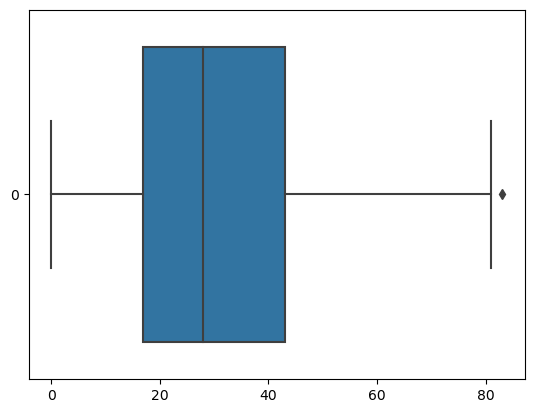

In [128]:
sns.boxplot(new_data['placement_exam_marks'],orient='horizontal')

C:\Users\hp\AppData\Local\Temp\ipykernel_16028\1371924520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['placement_exam_marks'])
C:\Users\hp\AppData\Local\Temp\ipykernel_16028\1371924520.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['placement_exam_marks'])


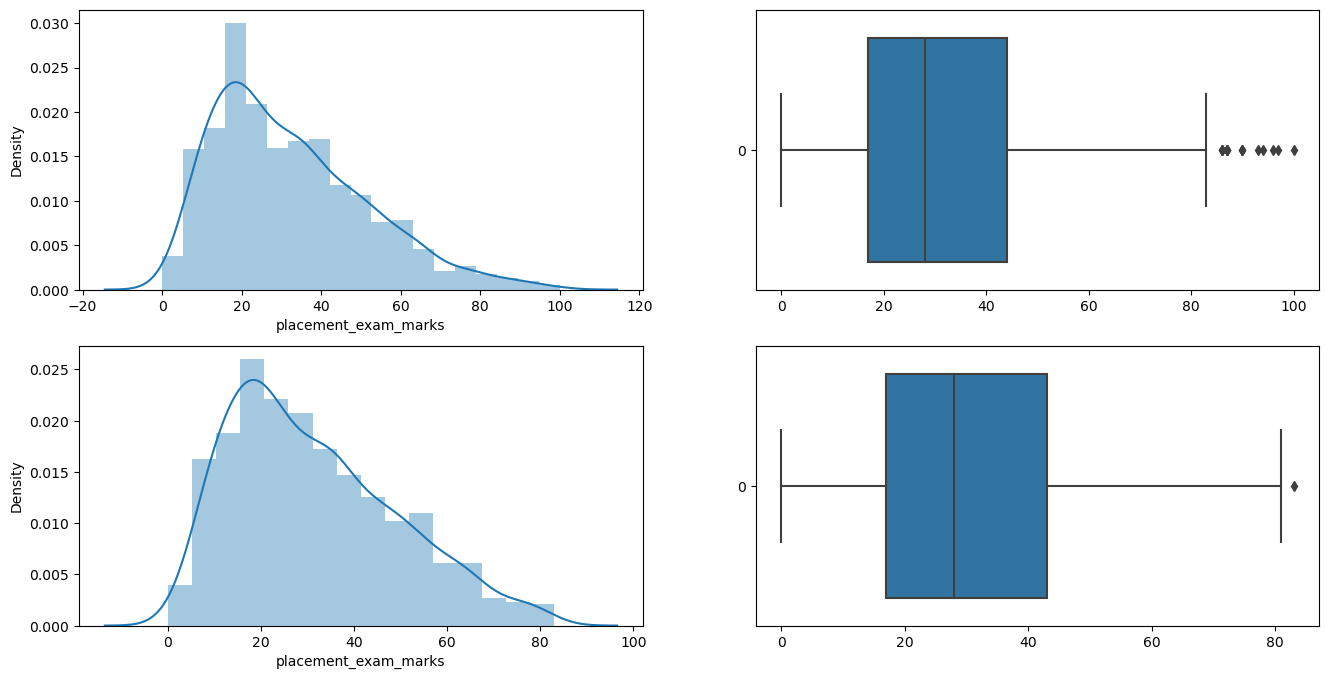

In [130]:
plt.figure(figsize=( 16,8))
plt.subplot(2,2,1)
sns.distplot(df4['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df4['placement_exam_marks'],orient = 'horizontal')

plt.subplot(2,2,3)
sns.distplot(new_data['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_data['placement_exam_marks'],orient='horizontal')

plt.show()


Capping method on top of this data

column name = placement exam marks

In [155]:
upper_limit = df4['placement_exam_marks'].mean() + 3 * df4['placement_exam_marks'].std()
lower_limit = df4['placement_exam_marks'].mean() - 3 * df4['placement_exam_marks'].std() 

In [157]:
upper_limit

88.73275602410413

In [158]:
lower_limit

-24.459756024104145

In [156]:
np.where(df4['placement_exam_marks']>upper_limit)

(array([], dtype=int64),)

In [159]:
np.where(df4['placement_exam_marks']>upper_limit ,upper_limit, np.where(df4['placement_exam_marks']<lower_limit,lower_limit,df4['placement_exam_marks']))

array([26. , 38. , 40. ,  8. , 17. , 23. , 11. , 39. , 38. , 84.5, 16. ,
        7. , 16. , 26. , 43. , 21. , 19. , 22. , 27. , 29. , 47. , 33. ,
       54. , 11. , 11. , 58. ,  8. , 46. , 19. , 15. , 16. , 44. , 11. ,
       27. ,  9. , 12. , 16. ,  9. , 20. , 17. , 84.5, 38. , 71. , 63. ,
       55. , 10. , 15. , 46. , 42. , 28. , 18. , 28. , 27. , 33. , 36. ,
       15. , 15. , 24. , 43. , 32. , 31. , 84.5, 22. , 26. , 52. , 28. ,
       31. , 18. , 30. , 44. , 17. , 20. , 19. , 12. ,  3. , 56. , 12. ,
       28. , 12. , 19. , 46. , 44. , 12. , 20. , 35. , 28. , 22. , 19. ,
       39. , 17. , 15. ,  6. , 63. , 30. , 21. , 35. , 28. , 52. , 76. ,
       23. , 46. , 26. , 22. , 18. , 47. , 12. , 22. ,  9. , 10. , 21. ,
       31. , 33. , 15. , 10. , 77. , 37. , 21. ,  0. , 54. , 39. , 46. ,
       27. , 51. , 52. , 30. , 55. , 37. , 23. , 25. , 39. , 53. , 19. ,
       18. , 64. , 84.5, 47. , 15. , 53. ,  8. ,  5. , 22. , 18. , 41. ,
       33. , 17. , 28. , 22. , 11. , 49. , 58. , 22